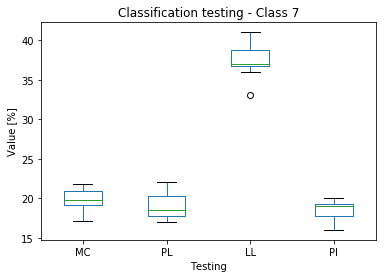

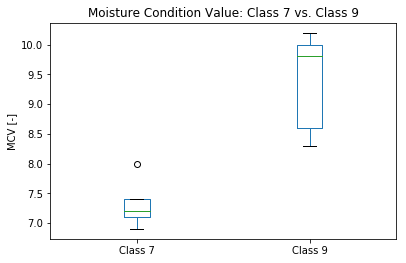

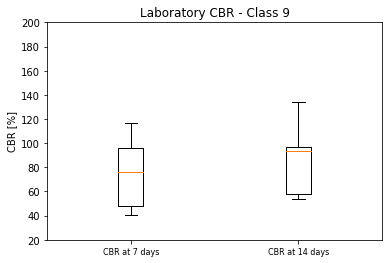

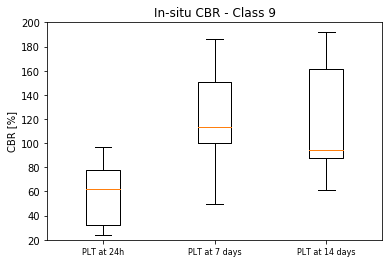

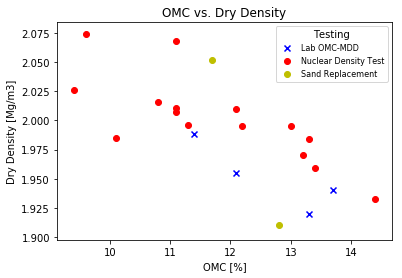

In [367]:
#import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set file path for data source
folder_path="C:/Users/ignacio.rivero/python_WIP/"
file_path = folder_path + "Stabilisation_Demo.csv"
#Load file into lab_shc
lab_sch= pd.read_csv(file_path)
#transform to a pandas Data Frame
df = pd.DataFrame(lab_sch)

#clean colums wth null/NA values
df2 =df.dropna(axis=1,how='all')
df2_C7 = df2[df2['ProposedClass'] ==  'Class 7'].dropna(axis=1,how='all')
df2_C9 = df2[df2['ProposedClass'] ==  'Class 9'].dropna(axis=1,how='all')
criterion_1 = df2['Test Reqd'] == 'Lab CBR (7 Day)' 
criterion_2 = df2['Test Reqd'] == 'Lab CBR (14 Day)'
criterion_3 = df2['Test Reqd'] == 'DCP' 
criterion_4 = df2['Test Reqd'] == 'PLT (24 hours)' 
criterion_5 = df2['Test Reqd'] == 'PLT (7 days)' 
criterion_6 = df2['Test Reqd'] == 'PLT (14 days)' 
criterion_7 = df2['Test Reqd'] == 'OMC_MDD' 
criterion_8 = df2['Test Reqd'] == 'NDT' 
criterion_9 = df2['Test Reqd'] == 'Sand Replacement' 
criterion_10 = criterion_8 | criterion_9    
criterion_11 = criterion_8 | criterion_9| criterion_11  
     
# Data frames for calculation and plotting
df_ddlab = df2[criterion_7].dropna(axis=1,how='all')
df_ddndt = df2[criterion_8].dropna(axis=1,how='all')
df_ddsr=df2[criterion_9].dropna(axis=1,how='all')
df_ddis = df2[criterion_10].dropna(axis=1,how='all')
df_dd = df2[criterion_11].dropna(axis=1,how='all')
    
#Get basic statistics, for all dataset and filtering by classes 7 and 9
df_desc = df2.describe()
df_desc_C7 = df2_C7.describe()
df_desc_C9 = df2_C9.describe()
df_desc_C9_ddlab = df_ddlab.describe()
df_desc_C9_ddis = df_ddis.describe()
#df_desc_Class = df.groupby('ProposedClass').describe()

# Printing statistics from Classes data frames
#print(df_desc_C7)
#print(df_desc_C9)

#Exporting tables to CSV
df_desc.to_csv(folder_path + 'df_stats.csv', encoding='utf-8')
df_desc_C7.to_csv(folder_path + 'df_stats_C7.csv', encoding='utf-8')
df_desc_C9.to_csv(folder_path + 'df_stats_C9.csv', encoding='utf-8')
df_desc_C9_ddlab.to_csv(folder_path + 'df_stats_C9_ddlab.csv', encoding='utf-8')
df_desc_C9_ddis.to_csv(folder_path + 'df_stats_C9_ddis.csv', encoding='utf-8')

# PLot Classification testing results
df2_C7.boxplot(column =['MC', 'PL', 'LL', 'PI'], grid = False) 
plt.title('Classification testing - Class 7')
plt.xlabel('Testing')
plt.ylabel('Value [%]')
plt.savefig(folder_path + "Classiffication.png")
plt.show()

# PLot MCV values
df2.boxplot(by = 'ProposedClass', column =['MCV'], grid = False) 
plt.suptitle('') 
plt.title('Moisture Condition Value: Class 7 vs. Class 9')
plt.xlabel('')
plt.ylabel('MCV [-]')
plt.savefig(folder_path + "MCV.png")
plt.show()

#Plot Laboratory CBR
CBR_7 = df2[criterion_1]
CBR_14 = df2[criterion_2]
labels_CBR = ["CBR at 7 days", "CBR at 14 days"]
fig, ax = plt.subplots()
ds1 = CBR_7[["Lab CBR"]].squeeze('columns')
ds2 = CBR_14[["Lab CBR"]].squeeze('columns')
data_CBR = [ds1,ds2]
bp_CBR = ax.boxplot(data_CBR)
ax.set_xticklabels(np.repeat(labels_CBR, 1), fontsize=8)
plt.title('Laboratory CBR - Class 9')
plt.xlabel('')
plt.ylabel('CBR [%]')
plt.ylim([20,200])
plt.savefig(folder_path + "CBR.png")
plt.show()

#PLot in-situ CBR resutls from PLT
PLT_24h = df2[criterion_4]
PLT_7 = df2[criterion_5]
PLT_14 = df2[criterion_6]
labels_PLT = ["PLT at 24h","PLT at 7 days", "PLT at 14 days"]
fig, ax = plt.subplots()
ds4 = PLT_24h[["CBR"]].squeeze('columns')
ds5 = PLT_7[["CBR"]].squeeze('columns')
ds6 = PLT_14[["CBR"]].squeeze('columns')
data_PLT = [ds4,ds5,ds6]
bp_PLT = ax.boxplot(data_PLT)
ax.set_xticklabels(np.repeat(labels_PLT, 1), fontsize=8)
plt.title('In-situ CBR - Class 9')
plt.xlabel('')
plt.ylabel('CBR [%]')
plt.ylim([20,200])
plt.savefig(folder_path + "CBR_PLT.png")
plt.show()

# Plot maximum dry density vs. optimum moisture content
colors = ['b', 'r', 'y']
lab = plt.scatter(df_ddlab['OMC'], df_ddlab['MDD'], marker='x', color=colors[0])
ndt = plt.scatter(df_ddndt['OMC'], df_ddndt['MDD'], marker='o', color=colors[1])
sr  = plt.scatter(df_ddsr['OMC'], df_ddsr['MDD'], marker='o', color=colors[2])

plt.legend((lab, ndt, sr),
           ('Lab OMC-MDD', 'Nuclear Density Test', 'Sand Replacement'),
           scatterpoints=1,
           loc='upper right',  title="Testing",
           ncol=1,
           fontsize=8)
plt.title('OMC vs. Dry Density')
plt.xlabel('OMC [%]')
plt.ylabel('Dry Density [Mg/m3]')
plt.savefig(folder_path + "OMC.png")
plt.show()